# Notebook proyecto EcoBici

Respectivo al artículo de Medium https://medium.com/p/f861a25b9677

In [1]:
# Importando modulos de análisis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid") # estilo de salida de las gráficas

from datetime import datetime

In [2]:
# Leyendo los datos
viajes = pd.read_csv('dataset/data_ecovia/2018-10.csv')
viajes.head()


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,58,2176,299,01/10/2018,0:00:02,75,01/10/2018,0:12:02
1,F,42,9816,43,01/10/2018,0:00:23,256,01/10/2018,0:15:02
2,M,30,11219,37,01/10/2018,0:00:34,1,01/10/2018,0:09:09
3,M,26,3910,123,01/10/2018,0:01:36,182,01/10/2018,0:37:22
4,M,29,11487,41,01/10/2018,0:02:39,30,01/10/2018,0:11:29


In [8]:
viajes.dtypes
viajes.shape

(784250, 11)

In [12]:
# concatenar Hora_Retiro y Fecha_Retiro
viajes['fecha_hora_retiro'] = viajes.Fecha_Retiro + ' ' + viajes.Hora_Retiro

# cambiar de str a datetime
viajes['fecha_hora'] = viajes.fecha_hora_retiro \
                             .map(lambda x : datetime.strptime(x, '%d/%m/%Y %H:%M:%S'))

# reindexar el dataframe
viajes.index = viajes.fecha_hora

# limpiar valores de otros años
viajes = viajes.loc['2018']
viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,fecha_hora_retiro,fecha_hora
fecha_hora,,,,,,,,,,,
2018-10-01 00:00:02,M,58,2176,299,01/10/2018,0:00:02,75,01/10/2018,0:12:02,01/10/2018 0:00:02,2018-10-01 00:00:02
2018-10-01 00:00:23,F,42,9816,43,01/10/2018,0:00:23,256,01/10/2018,0:15:02,01/10/2018 0:00:23,2018-10-01 00:00:23
2018-10-01 00:00:34,M,30,11219,37,01/10/2018,0:00:34,1,01/10/2018,0:09:09,01/10/2018 0:00:34,2018-10-01 00:00:34
2018-10-01 00:01:36,M,26,3910,123,01/10/2018,0:01:36,182,01/10/2018,0:37:22,01/10/2018 0:01:36,2018-10-01 00:01:36
2018-10-01 00:02:39,M,29,11487,41,01/10/2018,0:02:39,30,01/10/2018,0:11:29,01/10/2018 0:02:39,2018-10-01 00:02:39


In [13]:
viajes.shape

(784250, 11)

In [7]:
print(viajes.Bici.resample('H').count())

fecha_hora
2018-10-01 00:00:00      47
2018-10-01 01:00:00       0
2018-10-01 02:00:00       0
2018-10-01 03:00:00       0
2018-10-01 04:00:00       0
                       ... 
2018-10-31 19:00:00    2360
2018-10-31 20:00:00    1443
2018-10-31 21:00:00     821
2018-10-31 22:00:00     566
2018-10-31 23:00:00     261
Freq: H, Name: Bici, Length: 744, dtype: int64


In [10]:
# resample y agregacion por dia de mes
viajes_resample_day = viajes.Bici.resample('H').count()

# asignar día de la semana
df_resample = pd.concat([viajes_resample_day], axis=1)
df_resample['dayofweek'] = df_resample.index.dayofweek # 0 es lunes

# lunes a viernes
df_mon_to_fri = df_resample[df_resample.dayofweek.isin([0,1,2,3,4])].Bici
df_mon_to_fri.head()

fecha_hora
2018-10-01 00:00:00    47
2018-10-01 01:00:00     0
2018-10-01 02:00:00     0
2018-10-01 03:00:00     0
2018-10-01 04:00:00     0
Name: Bici, dtype: int64

In [15]:
df_resample['dayofweek'] = df_resample.index.month
pr = df_resample[df_resample.dayofweek.isin([0,1,2,3,4])]
pr.head()

,Bici,dayofweek
fecha_hora,,


In [12]:
df_mon_to_fri[0:(24*5)]

fecha_hora
2018-10-01 00:00:00      47
2018-10-01 01:00:00       0
2018-10-01 02:00:00       0
2018-10-01 03:00:00       0
2018-10-01 04:00:00       0
                       ... 
2018-10-05 19:00:00    1539
2018-10-05 20:00:00     460
2018-10-05 21:00:00     632
2018-10-05 22:00:00     394
2018-10-05 23:00:00     265
Name: Bici, Length: 120, dtype: int64

In [ ]:
df_mon_to_fri[0:(24*5)]

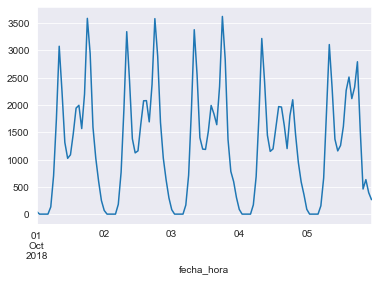

In [7]:
df_mon_to_fri[0:(24*5)].plot()
plt.show()

In [8]:
df_mon_to_fri

fecha_hora
2018-10-01 00:00:00      47
2018-10-01 01:00:00       0
2018-10-01 02:00:00       0
2018-10-01 03:00:00       0
2018-10-01 04:00:00       0
                       ... 
2018-10-31 19:00:00    2360
2018-10-31 20:00:00    1443
2018-10-31 21:00:00     821
2018-10-31 22:00:00     566
2018-10-31 23:00:00     261
Name: Bici, Length: 552, dtype: int64

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# definir conjunto de datos
x = df_mon_to_fri

# instanciar modelo
sarima_model = SARIMAX(x, order=(2,0,1), seasonal_order=(2, 1, 0, 24))

# ajustar modelo
results = sarima_model.fit()

# mirar el AIC
results.aic

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


7113.315343393358

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


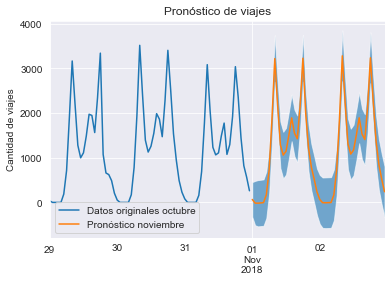

In [10]:
# tomar de datos originales dias 29-oct, 30-oct, y 31-oct
df_29_31 = df_mon_to_fri.loc['2018-10-29':'2018-10-31']
df_29_31.plot()

# agregar bandas de confianza
pred_1_2_conf = results.get_forecast(steps=24*2).conf_int()
pred_1_2_conf.index = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
x = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
y1 = pred_1_2_conf['lower Bici']
y2 = pred_1_2_conf['upper Bici']
plt.fill_between(x, y1, y2, alpha=0.6)

# predecir para 1-nov y 2-nov
pred_1_2 = results.get_forecast(steps=24*2).predicted_mean
pred_1_2.index = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
pred_1_2.plot()

# formato de la grafica final
plt.title('Pronóstico de viajes')
plt.ylabel('Cantidad de viajes')
# plt.xlabel('Semana lun-29-oct al vie-02-nov')
plt.xlabel(' ')
plt.legend(('Datos originales octubre', 'Pronóstico noviembre'),
           loc='lower left')
plt.savefig('pronostico.png', dpi=200)
plt.show()